<h1><center>TASK 1 FUZZY MATCHING ALGORITHM</center>  </h1> 
<h4>Name-Aayush Srivastava <br> Roll No- 23AG10003</h4>

first thing we need to do is check if we have the data in our data frame , I'll use pandas for this , need to make sure openpyxyl is installed.<br>
__[referred code to extract data](https://www.geeksforgeeks.org/reading-excel-file-using-python/)__



In [44]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
dataframe1 = pd.read_excel('TaskData.xlsx')

print(dataframe1)


          cokter
0      dentiists
1        Enginir
2         PoLICE
3      engneiear
4         DOcTRO
...          ...
1400     enginir
1401  aCcountANT
1402  accountant
1403      POlIcE
1404    enjineer

[1405 rows x 1 columns]


<div class="alert alert-block alert-info">
<h3> Levenshtein Edit Distance Algorithm for Fuzzy Matching </h3>
</div>

now that we are set with the data we'll use the Levenshtein distance algorithm to correct the given data (edit dist) <br>
edits can be insertion deletion or replacement , we will use recursion for this.<br>
basic logic by __[wikipedia](https://en.wikipedia.org/wiki/Levenshtein_dist)__ and this YouTube __[video](https://youtu.be/HVGsyi6Hh9s)__ <br>


I have used string slicing to implement the recursive version of the levenshtein distance 

In [45]:
def levenshtein(a, b):
    if not a: return len(b)
    if not b: return len(a)
    return min(levenshtein(a[1:], b[1:])+(a[0] != b[0]),
               levenshtein(a[1:], b)+1,
               levenshtein(a, b[1:])+1)

    
print(levenshtein("Club","Cell"))

3


using the algorithm above we can see that the levenshtein dist is correct and is 3 but since recursion is very slow and python is a sloth <br>
we have to optimise our usage of the levenstein algo we will use Dynamic Programming version of this levenstein algo which will improve our time complexity to O(m*n) <br>
<h4>This is known as Wagner Fischer Levenshtein Algorithm </h4> 


References <br>
__[How do spellcheckers work](https://youtu.be/Cu7Tl7FGigQ)__ <br>
__[referred code](https://www.scaler.com/topics/levenshtein-dist-python/)__ <br>
__[referred video for DP logic](https://youtu.be/Dd_NgYVOdLk)__

In [46]:
import pandas as pd

# Function to calculate Levenshtein dist between two strings
def levenshteinDistance(A, B):
    N, M = len(A), len(B)
    # Create an array of size NxM
    dp = [[0 for i in range(M + 1)] for j in range(N + 1)]

    # Base Case: When N = 0
    for j in range(M + 1):
        dp[0][j] = j
    # Base Case: When M = 0
    for i in range(N + 1):
        dp[i][0] = i
    # Transitions
    for i in range(1, N + 1):
        for j in range(1, M + 1):
            if A[i - 1] == B[j - 1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(
                    dp[i-1][j], # Insertion
                    dp[i][j-1], # Deletion
                    dp[i-1][j-1] # Replacement
                )

    return dp[N][M]


# given list 
correctlist = [
    "Doctor", "Lawyer", "Teacher", "Engineer", "Accountant",
    "Nurse", "Police", "Architect", "Dentist", "Pharmacist"
]

# Function to correct misspelled career options
def correctedfunc(option):
    mindist = 10000000 #setting this to a high number (preferably infinite but 10000000 works just as good)
    correctedoption = option
    for careeroption in correctlist:
        dist = levenshteinDistance(option.lower(), careeroption.lower()) # converting all to lower 
        if dist < mindist:
            mindist = dist
            correctedoption = careeroption
    return correctedoption

# reading excel file data 
data = pd.read_excel('TaskData.xlsx', header=None)

# lets call the first column original
data.columns = ['Original']

# adding a new column to the excel sheet
data['Corrected'] = data['Original'].apply(correctedfunc)

# we will save the corrected data in a new excel file calling it CorrectedTaskData
data.to_excel('CorrectedTaskData.xlsx', index=False)
print(data)


        Original   Corrected
0         cokter      Doctor
1      dentiists     Dentist
2        Enginir    Engineer
3         PoLICE      Police
4      engneiear    Engineer
...          ...         ...
1401     enginir    Engineer
1402  aCcountANT  Accountant
1403  accountant  Accountant
1404      POlIcE      Police
1405    enjineer    Engineer

[1406 rows x 2 columns]


Now time to plot and show the frequency that we have collected 

Engineer: 328
Doctor: 225
Teacher: 195
Dentist: 192
Police: 162
Nurse: 85
Lawyer: 82
Architect: 63
Pharmacist: 42
Accountant: 32


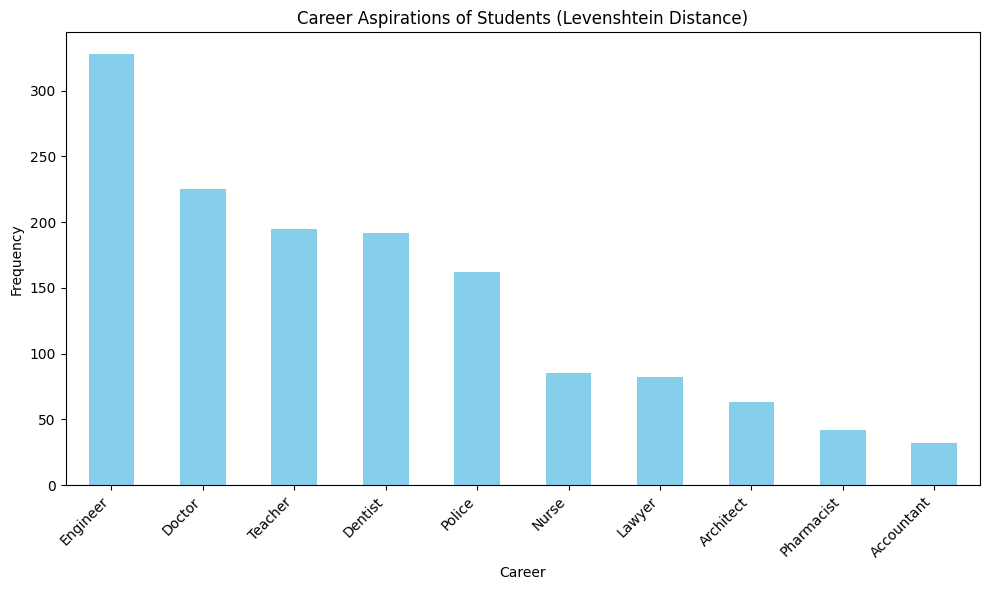

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('CorrectedTaskData.xlsx')
career_freq = data['Corrected'].value_counts()

for career, freq in career_freq.items():  #displaying the frequency of the career counts 
    print(f"{career}: {freq}")

#plotting on a bar chart
plt.figure(figsize=(10, 6))
career_freq.plot(kind='bar', color='skyblue')
plt.title('Career Aspirations of Students (Levenshtein Distance)')
plt.xlabel('Career')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # rotating to avoid a mess
plt.tight_layout()
plt.show()


as we can see Engineer has the highest aspiration clearly

<h1>Trying Other Algos</h1>

<div class="alert alert-block alert-info">
<h3> Jaccard Similarity  Algorithm for Fuzzy Matching </h3>
</div>

we'll use the logic listed here __[here](https://studymachinelearning.com/jaccard-similarity-text-similarity-metric-in-nlp/#google_vignette)__
basically it takes a number knowns as the jaccard coeffient which is intersection / union of the two string's characters and then gives a numerical value <br>
we compare it all the carreer options the ones with the highest value will be the corrected career option

Engineer: 330
Teacher: 213
Doctor: 210
Dentist: 192
Police: 162
Nurse: 83
Lawyer: 82
Architect: 60
Pharmacist: 42
Accountant: 32


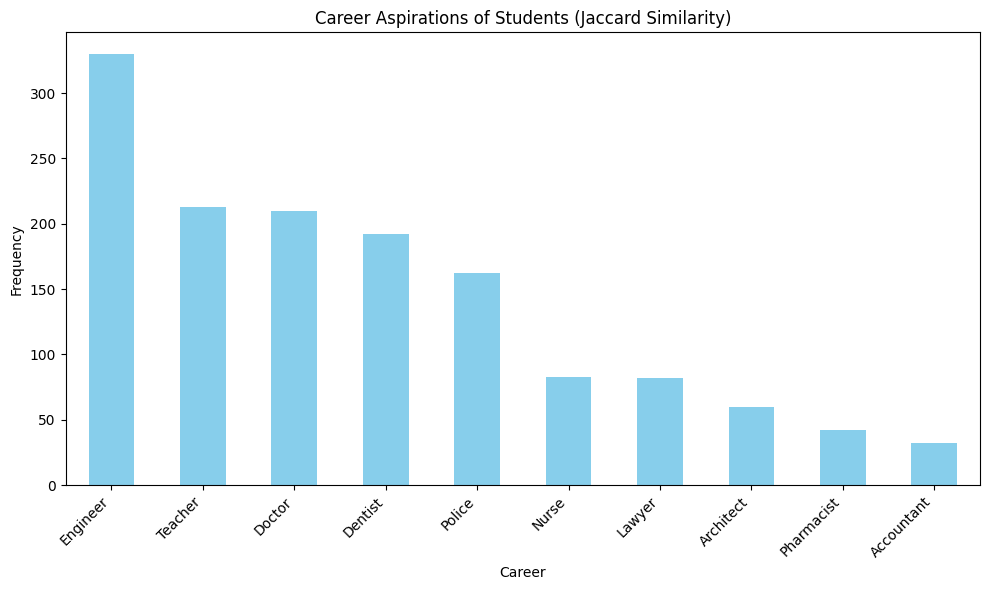

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate Jaccard similarity between two strings
def jaccard(s1, s2):
    set1 = set(s1.lower()) # we will lowercase all 
    set2 = set(s2.lower())
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0  # return 0 if union is zero meaning no similarity 

# Function to correct misspelled career options using Jaccard similarity
def correctoptionjaccard(option):
    maxsimilarity = 0
    corrected_option = option
    for careeroption in correctlist:
        similarity = jaccard(option, careeroption)
        if similarity > maxsimilarity:
            maxsimilarity = similarity
            corrected_option = careeroption
    return corrected_option

# Read corrected data from the Excel file
data = pd.read_excel('CorrectedTaskData.xlsx')

# List of correct career options
correctlist = [
    "Doctor", "Lawyer", "Teacher", "Engineer", "Accountant",
    "Nurse", "Police", "Architect", "Dentist", "Pharmacist"
]
data['Corrected_Jaccard'] = data['Original'].apply(correctoptionjaccard)
careerfreqjaccard = data['Corrected_Jaccard'].value_counts()

# Print career options and their frequencies
for career, freq in careerfreqjaccard.items():
    print(f"{career}: {freq}")

# Plotting the bar chart
plt.figure(figsize=(10, 6))
careerfreqjaccard.plot(kind='bar', color='skyblue')
plt.title('Career Aspirations of Students (Jaccard Similarity)')
plt.xlabel('Career')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


we can see jaccard is quite close to levenshtein in terms of getting the frequency of carreer options, but not quite exact this might be due to some oversight in jaccards or levenshteins algorithm

More Algos N gram similarity, Cosine Similarity , Bitap matching, Hamming distance, BK Tree etc....